In [2]:
#Imorting Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading Dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [5]:
#Summary Statistics
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


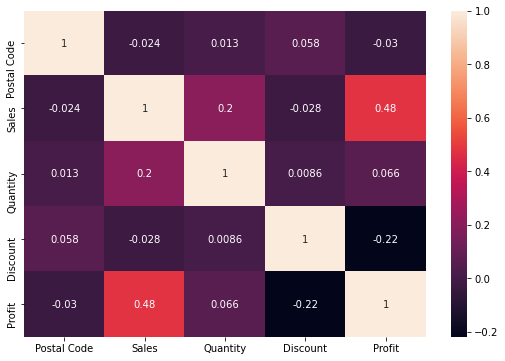

In [10]:
plt.figure(figsize=(9,6))
heatmap = sns.heatmap(df.corr(),annot = True)
heatmap

In [17]:
#Total Sales Amount
sales = df['Sales'].sum()
print('Total Sales Amount =', sales)

Total Sales Amount = 2297200.8603


In [20]:
#Total Quantity
Quantity = df['Quantity'].sum()
print('Toatl Units Sold =', Quantity)

Toatl Units Sold = 37873


In [16]:
#Total Profit
total_profit = df['Profit'].sum()
print('Total Profit =', total_profit)

Total Profit = 286397.0217


In [18]:
#Total Discount
discount = df['Discount'].sum()
print('Total Discount =', discount)

Total Discount = 1561.09


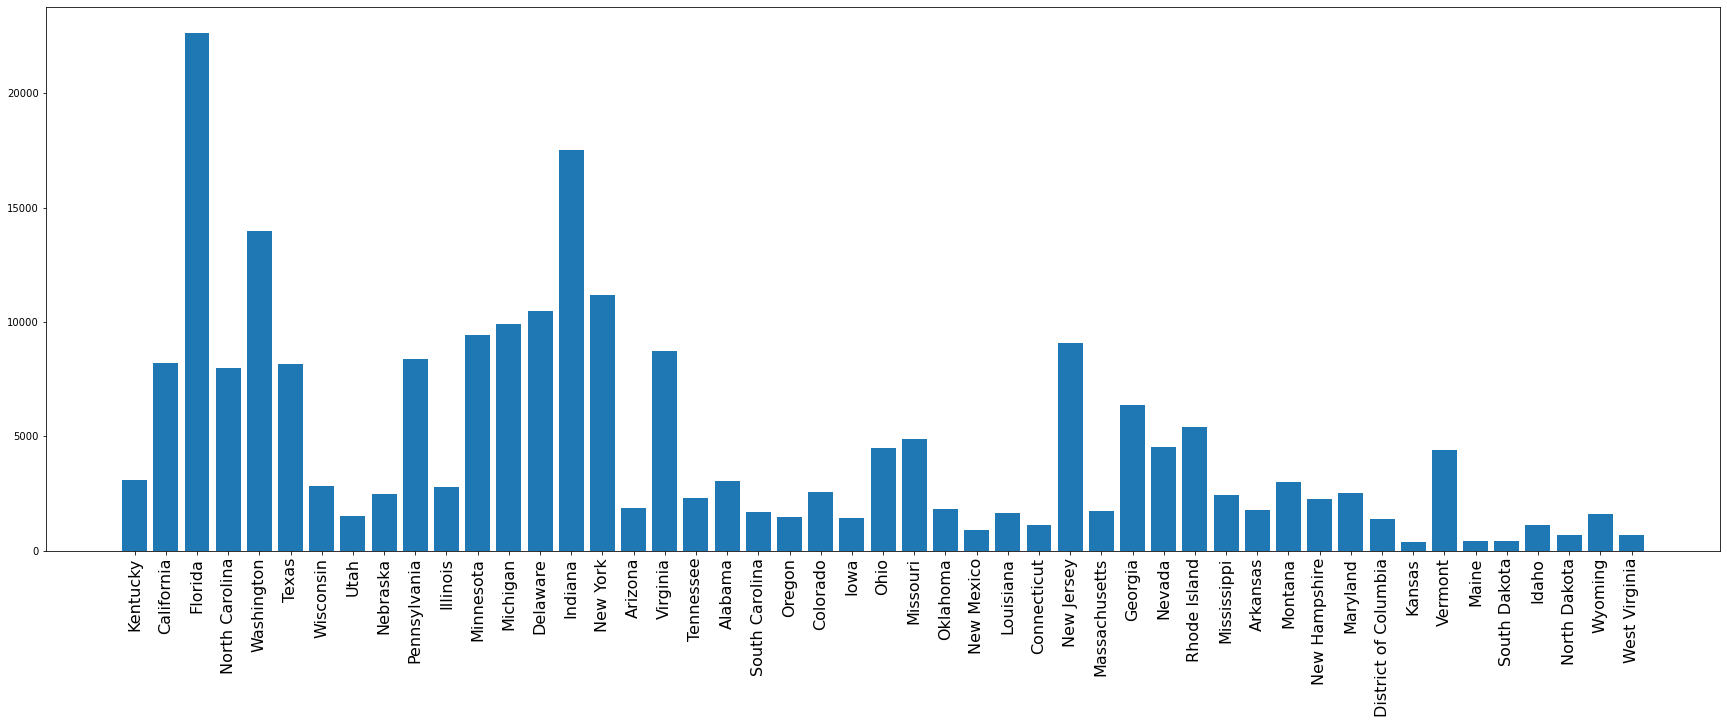

In [42]:
#Statewise Sales
plt.figure(figsize=(30,10))
plt.xticks(fontsize=16,rotation=90)
plt.bar(df['State'],df['Sales'])
plt.show()

In [18]:
#Quantity Shipped Via
df.shipmode = df.groupby('Ship Mode')['Quantity'].sum()
print(df.shipmode)

Ship Mode
First Class        5693
Same Day           1960
Second Class       7423
Standard Class    22797
Name: Quantity, dtype: int64


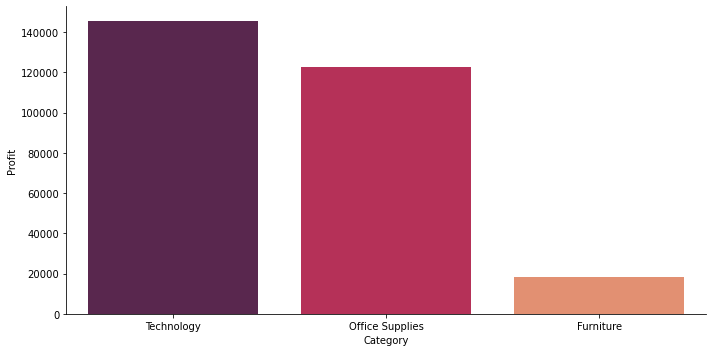

In [21]:
#Profits by Categories
category_profit = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sns.catplot('Category', 'Profit', data=category_profit, kind='bar', aspect=2, height=5, palette="rocket")

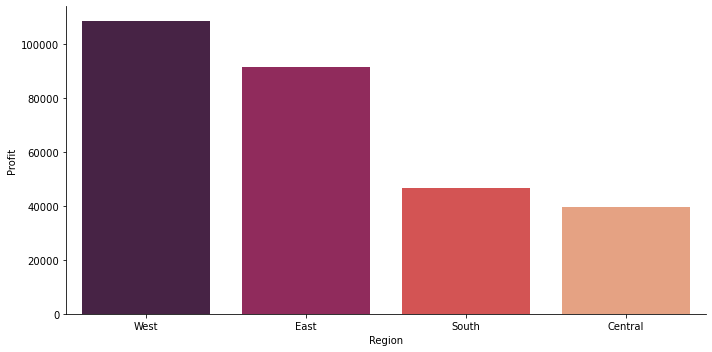

In [10]:
#Regionwise Profit
region_profit=df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sns.catplot('Region', 'Profit', data=region_profit, kind='bar', aspect=2, height=5, palette="rocket")

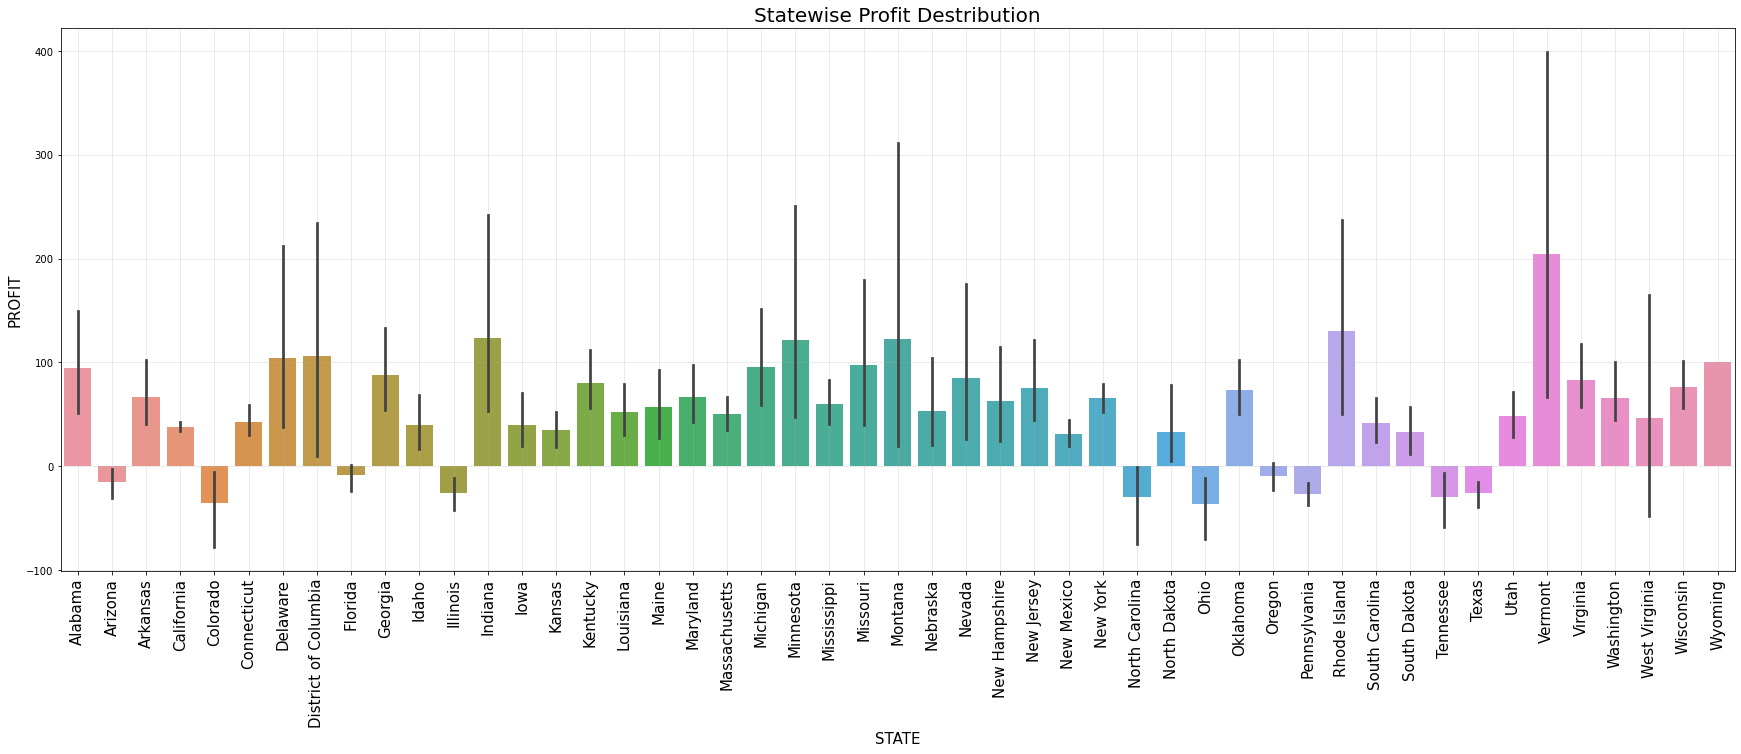

In [28]:
plt.figure(figsize=(30,10))
sns.barplot(x=df['State'].sort_values(),y=df['Profit'])
plt.title('Statewise Profit Destribution', fontsize=20)
plt.xticks(rotation=90, fontsize=15);
plt.xlabel('STATE',fontsize=15)
plt.ylabel('PROFIT',fontsize=15)
plt.grid(alpha=0.3)
plt.show()